In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [106]:
df = pd.read_hdf('../../data.nosync/train_processed_e1.h5', key='table')
# df_smoothed = pd.read_hdf('../../data.nosync/train_good_smoothed.h5', key='table')

In [46]:
df.shape

(628997, 4)

In [112]:
df_new = pd.DataFrame()
for i, (col_name, v) in enumerate(zip(df.columns, [2.5, 2.7, 2.9])):
    if col_name == 'ttf':
        continue
#     time_data = np.linspace(0,df[col_name].shape[0]-1,df[col_name].shape[0])
#     signal = (df[col_name] - df[col_name].mean()).values
#     fr=np.fft.fftfreq(signal.size)  # a nice helper function to get the frequencies  
#     fou=np.fft.fft(signal)
#     w=0.001
#     gpl= 6*np.exp(- ((fr-w)/(2*w))**2) #+ np.exp(- ((fr-0.01)/(2*df))**2)  # pos. frequencies
#     gmn= 6*np.exp(- ((fr+w)/(2*w))**2) #+ np.exp(- ((fr+0.01)/(2*df))**2)  # neg. frequencies
#     g=gpl +gmn    
#     filt=fou*g
#     signal_smooth=np.real(np.fft.ifft(filt))
    signal_smooth = savgol_filter(df[col_name], window_length=10001, polyorder=2)
    df_new[col_name] = signal_smooth
df_new['ttf'] = df['ttf']

/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [48]:
df_new.shape

(628997, 4)

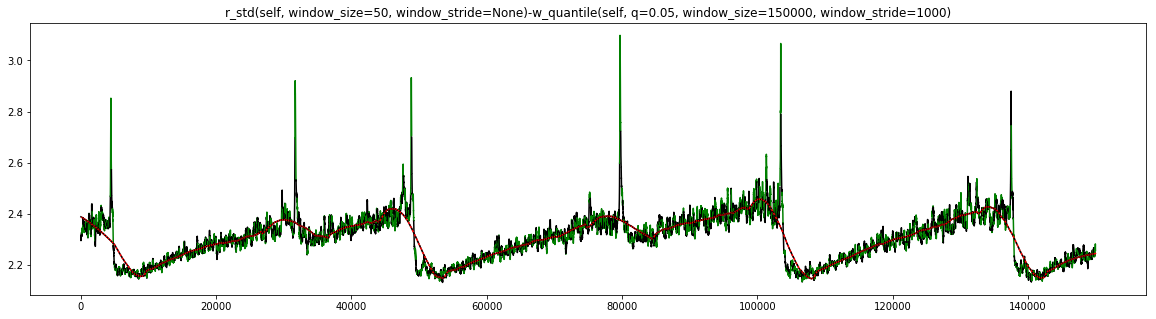

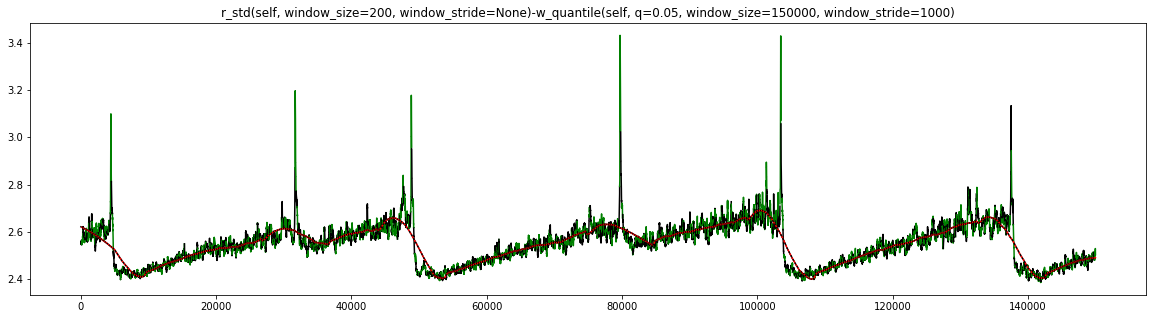

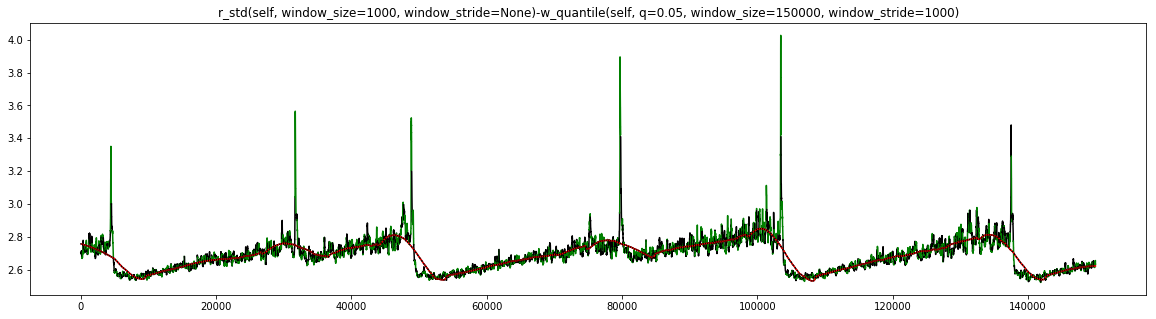

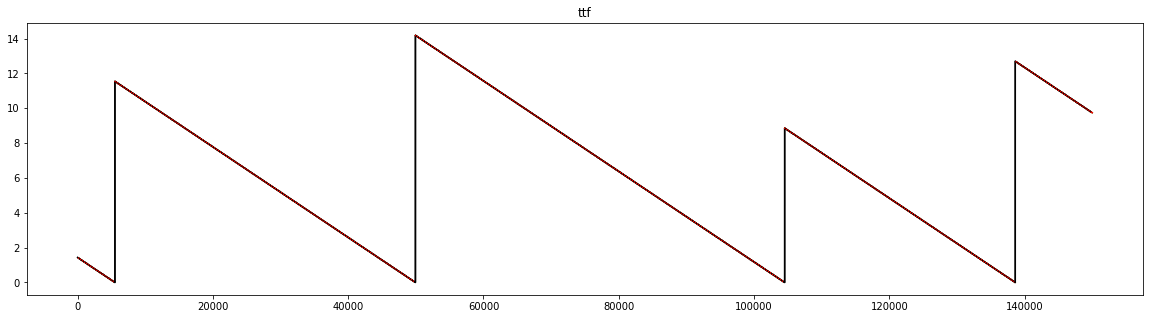

In [113]:
for col in df.columns:
    plt.figure(figsize=(20, 5))
    for i in range(1000):
        if i%2:
            plt.plot(df[col][i*150:i*150+150], 'g')
        else:
            plt.plot(df[col][i*150:i*150+150], 'k')
    for i in range(1000):
        if i%2:
            plt.plot(df_new[col][i*150:i*150+150], 'r')
        else:
            plt.plot(df_new[col][i*150:i*150+150], 'k')
    plt.title(col)

In [114]:
df_new.to_hdf('../../data.nosync/train_good_smoothed_better_e1.h5', key='table')

In [94]:
df_new.shape

(628997, 4)